This version use the native approach. 
We use the feedback (set of 3 colors: green, yellow, grey) to reduce the list of allowed words(13k words) then give randomly the guess for the next step <br />
CONVENTION: <br />
Guess: The word suggested by the programming  <br />
Feedback: The set of 3 colours: green, yellow, grey represented by 2,1,0 respectively  <br />
Answer: The final answer of game or the word to check the guess then give the feedback

In [1]:
with open('allowed_words.txt','r') as file:
    allowed_lst=[]
    for i in file:
        allowed_lst.append(i[:5])


In [2]:
def get_feedback(guess:str,answer:str) -> list: 
    """
    get_feeback
    ----------
    guess: Five-letter guess.
        
    answer: Five-letter correct answer.
        
    Returns: Feedback contains 05 elements, which can be 0, 1, or 2, denoting a feedback pattern.

    """
    # convert string to list
    temp = list(answer)
    answer = temp
    temp = list(guess)
    guess = temp
    
    #initialize
    feedback = ['']*5
    
    # isolate correctly placed letters
    for i in range(5):
        if guess[i] == answer[i]:
            feedback[i] = 2
            answer[i] = ''
            guess[i] = ''
    
    #isolate wrongly placed letters
    for i in range(5):
        if guess[i] == '': continue
        elif guess[i] in answer:
            feedback[i] = 1
            answer[answer.index(guess[i])] = ''
            guess[i] = ''
        else:
            feedback[i] = 0
    
    return feedback
# get_feedback('speed','crepe')

In [3]:
def reduce_list(guess:str,feedback:list,word_list:list) ->list:
    '''This function return the reduced allowed word list which have real answer
    
    guess: the word we guessed in this step
    feedback: the pattern given by game
    word_list: allowed list in the first step and the reduced list in the next steps
    '''
    return [word for word in word_list if get_feedback(guess,word)==feedback]
# FixBug:compare guess to all possible answer word, (guess vs real answer ->fb, find in list a word have same fb,answer in possible list, word~answer)



SOLUTION fuction (may be and solution for test)

In [4]:
import random
def solution_inputted_feedback(answer):
    word_list=allowed_lst
    feedback=[0,0,0,0,0]
    while True:
        guess=random.choice(word_list)
        # print(guess)
        feedback=[int(i) for i in str(input())] #string
        if feedback==[2]*5:
            break
        word_list=reduce_list(guess,feedback,word_list)
# answer='apple'
# solution_inputted_feedback(answer)

In [5]:
def solution_for_test(answer):
    word_list=allowed_lst
    k=0
    while True:
        k+=1
        guess=random.choice(word_list)
        # print(guess)
        feedback=get_feedback(guess,answer)
        if feedback==[2]*5:
            break
        word_list=reduce_list(guess,feedback,word_list)
    return k
print(solution_for_test('cutes'))

5


TEST

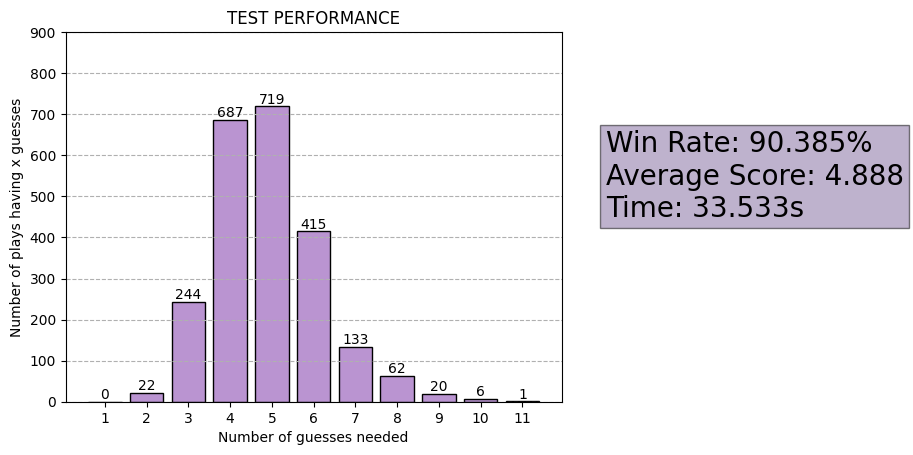

(90.38544824599394, 4.888263317453443)

In [24]:
def TestModel():
    '''This function give the bar chart with x(number of guesses needed) \n
    and y(number of plays having x guesses)'''
    import time
    t1=time.time()
    with open("possible_words.txt","r") as file:
        possible_lst=[]
        for i in file:
            possible_lst.append(i[:5])
    
    #Compute some vital factor: number of plays having x guesses, win rate, average score of 2,3k plays   
    xMax=20 # may be posituve infinity number
    yMax=0
    lst=[0]*xMax # list contains number of plays having x guesses
    for word in possible_lst:
        answer=word
        NumberOfGuessesNeeded=solution_for_test(answer) 
        lst[NumberOfGuessesNeeded]=lst[NumberOfGuessesNeeded]+1
    N=len(possible_lst)
    winrate=sum(lst[1:7])/N*100
    average=sum([i*lst[i] for i in range(1,xMax)]) / N
    
    #VISUALIZATION
    import matplotlib.pyplot as plt
    for i in range(1,xMax):
        if lst[i] >=yMax: # because yMax always in (1,6)
            yMax=lst[i]
        if lst[i]==0 and i>6:
            xMax=i
            break
    yMax=(yMax//100+2)*100
    x=[str(i) for i in range(1,xMax)]
    y=[i for i in lst[1:xMax]]
    plt.ylim(0,yMax)
    plt.grid(axis='y',linestyle='--')
    plt.xlabel('Number of guesses needed')
    plt.ylabel('Number of plays having x guesses')
    plt.title('TEST PERFORMANCE')
    plt.bar(x,y, fc="#BA94D1", ec="black")
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha="center", va="bottom")
    t2=time.time()
    time=t2-t1
    plt.text(xMax,yMax/2, f'Win Rate: {winrate:.3f}%\nAverage Score: {average:.3f}\nTime: {time:.3f}s', fontsize = 20,
		bbox = dict(facecolor = '#7F669D', alpha = 0.5))
    plt.show()
    return winrate,average
#fix bug visualization, x,y...
TestModel()
        


33.8s - 0.014s
winrate=0.8925941966219142
average=4.889129493287137

winrate=90.29883066262451%
average=4.886530965786054

winrate=88.99956691208315%
average=4.911650064963188
